In [257]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [258]:
#reading the data

In [259]:
df=pd.read_csv("globalplant.csv")

In [260]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
#fetching the info about the data

In [262]:
df.shape

(907, 27)

We have 907 rows and 27 columns in data

In [263]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [265]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

missing values are many so removing some columns which have maximum null values and also not affect the data

In [266]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [267]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

also removing some unwanted data

In [268]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [269]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [270]:
df['year_of_capacity_data'].nunique()

1

removing year_of_capacity_data as it has unique value and not affect the data

In [271]:
df['name'].nunique()

907

also dropping name column there no use of it

In [272]:
df.drop(['name','url'],axis=1,inplace=True)

In [273]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [274]:
# filling geolocation_source with mode because it is category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [275]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [276]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [277]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

no missing values

In [278]:
#visualizing using heatmap

<AxesSubplot:>

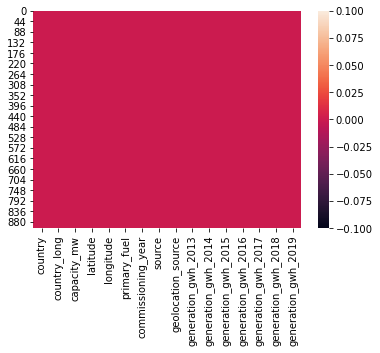

In [279]:
sns.heatmap(df.isnull())

In [280]:
df['source'].nunique()

191

In [281]:
df['geolocation_source'].nunique()

3

In [282]:
df['country_long'].nunique()

1

In [283]:
df['country'].nunique()

1

dropping columns 'country' and 'country_long' because having one country name only

In [284]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [285]:
df['generation_gwh_2013'].nunique()

1

In [286]:
df.drop(['generation_gwh_2013'],axis=1,inplace=True)

In [287]:
df['generation_gwh_2019'].nunique()

1

In [288]:
df['generation_gwh_2018'].nunique()

411

In [289]:
df['generation_gwh_2017'].nunique()

409

In [290]:
df['generation_gwh_2016'].nunique()

404

In [291]:
df['generation_gwh_2015'].nunique()

397

In [292]:
df['generation_gwh_2014'].nunique()

372

In [293]:
df.drop(['generation_gwh_2019'],axis=1,inplace=True)

In [294]:
df['commissioning_year']

0      2011.0
1        59.2
2        59.2
3      2004.0
4      2015.0
        ...  
902    2016.0
903      59.2
904      59.2
905      59.2
906      59.2
Name: commissioning_year, Length: 907, dtype: float64

In [295]:
df.drop(['commissioning_year'],axis=1,inplace=True)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.1+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

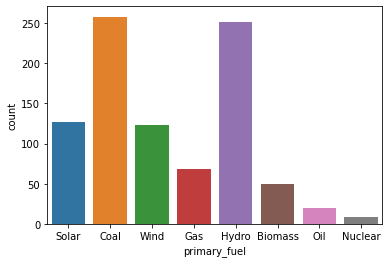

In [297]:
sns.countplot(x="primary_fuel", data=df)

In [298]:
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.053917,0.216974,0.814674,0.841468,0.875369,0.892899,0.905488
latitude,-0.053917,1.000000,-0.500920,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212
longitude,0.216974,-0.500920,1.000000,0.160584,0.170438,0.186348,0.199703,0.199273
generation_gwh_2014,0.814674,-0.029067,0.160584,1.000000,0.966673,0.937892,0.907541,0.898658
generation_gwh_2015,0.841468,-0.030007,0.170438,0.966673,1.000000,0.974653,0.943781,0.936566
generation_gwh_2016,0.875369,-0.031473,0.186348,0.937892,0.974653,1.000000,0.976306,0.967607
generation_gwh_2017,0.892899,-0.024888,0.199703,0.907541,0.943781,0.976306,1.000000,0.988031
generation_gwh_2018,0.905488,-0.028212,0.199273,0.898658,0.936566,0.967607,0.988031,1.000000


<AxesSubplot:>

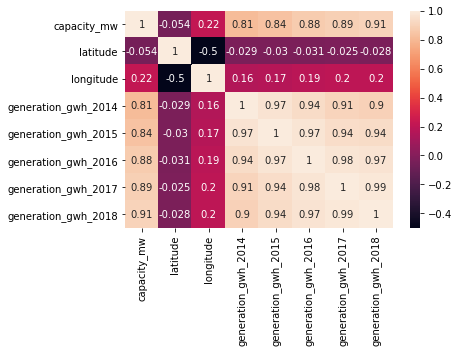

In [299]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

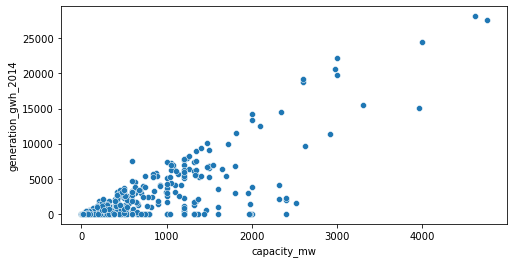

In [300]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

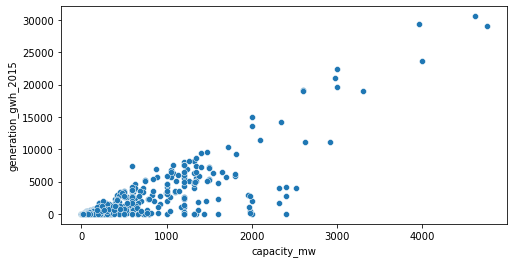

In [301]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

it is also increasing

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

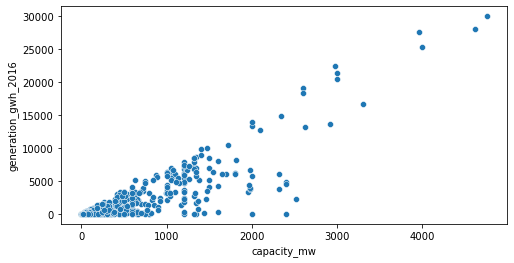

In [302]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

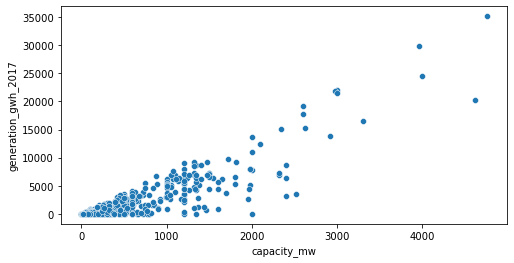

In [303]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

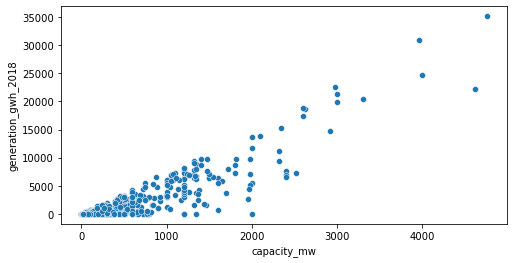

In [304]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

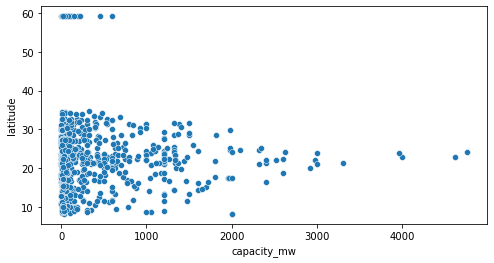

In [305]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

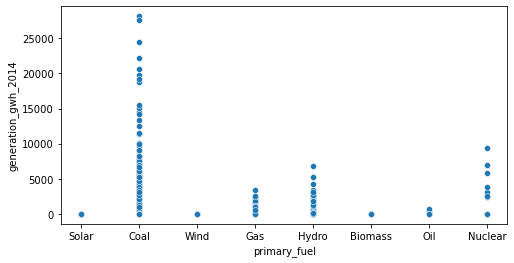

In [306]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

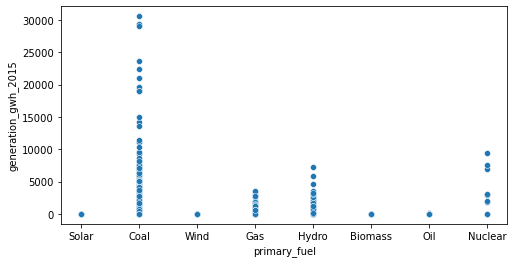

In [307]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

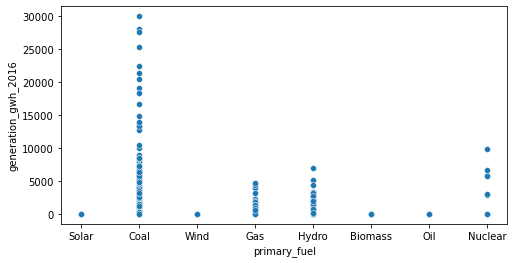

In [308]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

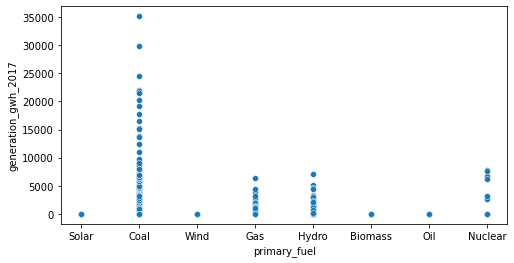

In [309]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

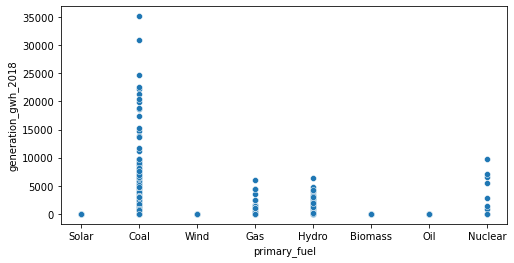

In [310]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

in all the year from 2014 to 2018, coal is most used fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

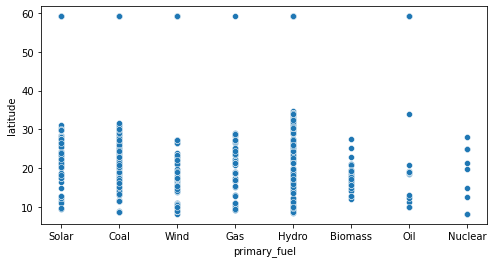

In [311]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

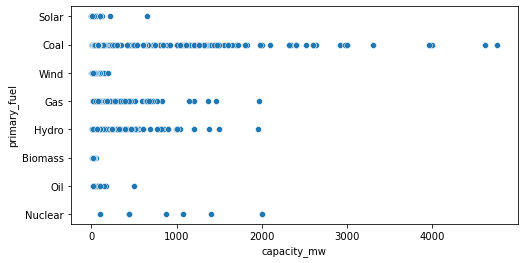

In [312]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal is on max electrical generating capacity in megawatts

In [313]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [314]:
#using label encoder to channge the categorical data into numerical

In [315]:
from sklearn.preprocessing import LabelEncoder

In [316]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [317]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

all are encoded

In [318]:
#checking skewness

In [319]:
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
dtype: float64

In [320]:
#visualizing using boxplot

capacity_mw               AxesSubplot(0.125,0.772143;0.110714x0.107857)
latitude               AxesSubplot(0.257857,0.772143;0.110714x0.107857)
longitude              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
primary_fuel           AxesSubplot(0.523571,0.772143;0.110714x0.107857)
source                 AxesSubplot(0.656429,0.772143;0.110714x0.107857)
geolocation_source     AxesSubplot(0.789286,0.772143;0.110714x0.107857)
generation_gwh_2014       AxesSubplot(0.125,0.642714;0.110714x0.107857)
generation_gwh_2015    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
generation_gwh_2016    AxesSubplot(0.390714,0.642714;0.110714x0.107857)
generation_gwh_2017    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
generation_gwh_2018    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
dtype: object

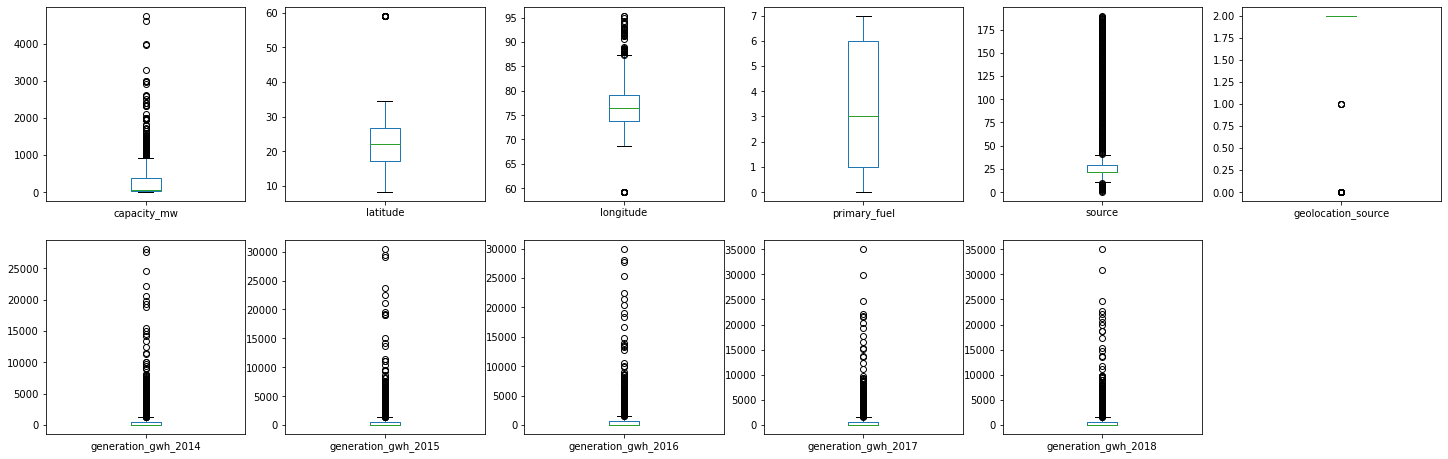

In [321]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(25,25))

In [322]:
#removing outliers

In [323]:
from scipy.stats import zscore
z=abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [324]:
df.shape

(819, 11)

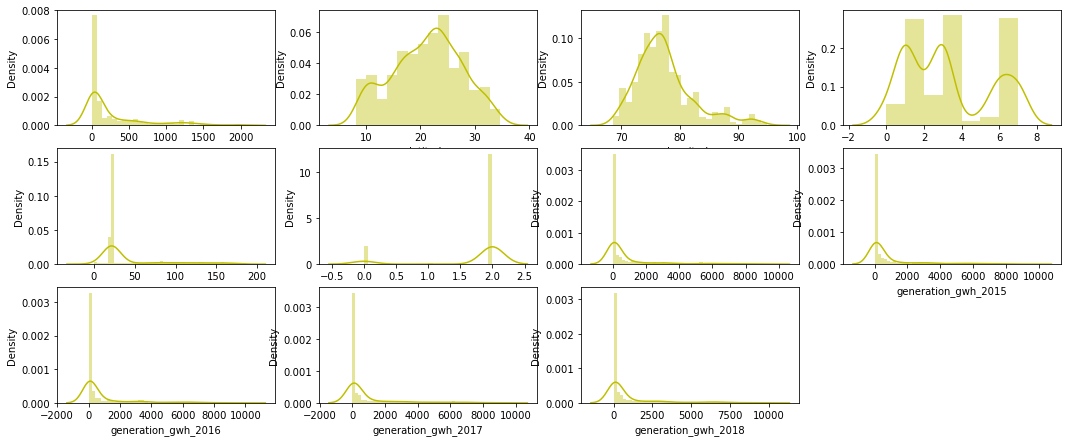

In [325]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='y')

In [326]:
df.skew()

capacity_mw            1.950396
latitude              -0.132456
longitude              1.124213
primary_fuel           0.462746
source                 1.785226
geolocation_source    -2.059260
generation_gwh_2014    2.754701
generation_gwh_2015    2.585918
generation_gwh_2016    2.535846
generation_gwh_2017    2.447230
generation_gwh_2018    2.499319
dtype: float64

In [327]:
#using log transform to remove skewness

In [354]:
df['capacity_mw']=np.log(df['capacity_mw'])
df['capacity_mw'].skew()

-2.361447009488956

In [355]:
df['generation_gwh_2014']=np.log(df['generation_gwh_2014'])
df['generation_gwh_2014'].skew()

-0.1453796953199465

In [356]:
df['generation_gwh_2015']=np.log(df['generation_gwh_2015'])
df['generation_gwh_2015'].skew()

-1.942712640552942

In [357]:
df['generation_gwh_2016']=np.log(df['generation_gwh_2016'])
df['generation_gwh_2016'].skew()

0.28624338839914626

In [358]:
df['generation_gwh_2017']=np.log(df['generation_gwh_2017'])
df['generation_gwh_2017'].skew()

-0.3195589559774968

In [359]:
df['generation_gwh_2018']=np.log(df['generation_gwh_2018'])
df['generation_gwh_2018'].skew()

0.47024729326347015

In [360]:
df.skew()

capacity_mw           -2.361447
latitude              -0.132456
longitude              1.124213
primary_fuel           0.462746
source                 1.785226
geolocation_source    -2.059260
generation_gwh_2014   -0.145380
generation_gwh_2015   -1.942713
generation_gwh_2016    0.286243
generation_gwh_2017   -0.319559
generation_gwh_2018    0.470247
dtype: float64

In [361]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.042910,0.254113,-0.444791,-0.329008,0.519266,0.477777,0.445978,0.527641,0.526210,0.581097
latitude,0.042910,1.000000,0.025075,-0.017038,0.062857,-0.180743,0.130071,0.143441,0.177574,0.138820,0.151593
longitude,0.254113,0.025075,1.000000,-0.366513,-0.246006,0.259350,0.245396,0.232042,0.317558,0.334124,0.352871
primary_fuel,-0.444791,-0.017038,-0.366513,1.000000,0.072864,-0.501431,-0.361822,-0.350652,-0.428037,-0.422239,-0.459464
source,-0.329008,0.062857,-0.246006,0.072864,1.000000,-0.528292,-0.318765,-0.291999,-0.339254,-0.339540,-0.380670
geolocation_source,0.519266,-0.180743,0.259350,-0.501431,-0.528292,1.000000,0.263524,0.241396,0.280447,0.280627,0.314538
generation_gwh_2014,0.477777,0.130071,0.245396,-0.361822,-0.318765,0.263524,1.000000,0.782927,0.827714,0.766133,0.792135
generation_gwh_2015,0.445978,0.143441,0.232042,-0.350652,-0.291999,0.241396,0.782927,1.000000,0.771497,0.718901,0.743201
generation_gwh_2016,0.527641,0.177574,0.317558,-0.428037,-0.339254,0.280447,0.827714,0.771497,1.000000,0.910669,0.925218
generation_gwh_2017,0.526210,0.138820,0.334124,-0.422239,-0.339540,0.280627,0.766133,0.718901,0.910669,1.000000,0.919828


<AxesSubplot:>

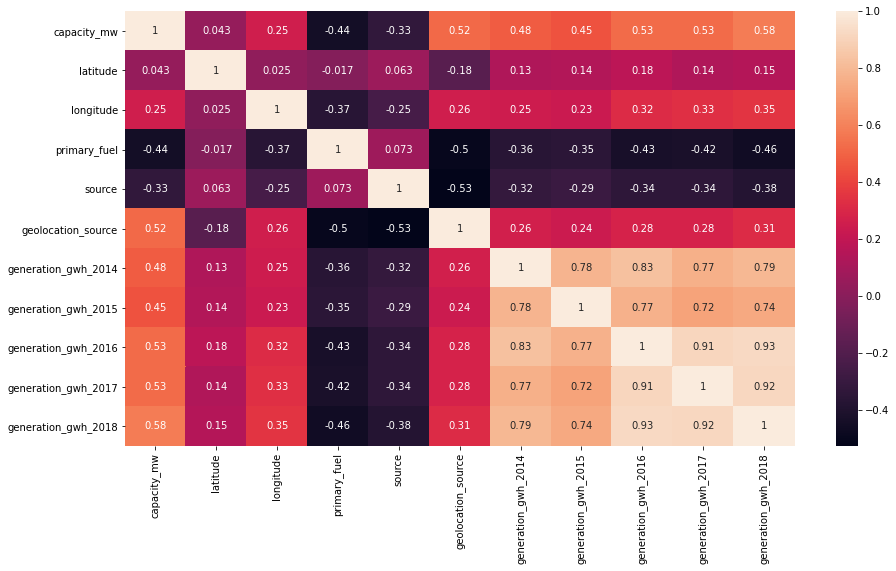

In [362]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [363]:
#First taking 'capacity_mw' as target and implementing ML Model

In [369]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [370]:
x.shape

(819, 10)

In [371]:
y.shape

(819,)

In [373]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [374]:
pd.DataFrame(df).isnull().sum()

capacity_mw            35
latitude                0
longitude               0
primary_fuel            0
source                  0
geolocation_source      0
generation_gwh_2014    26
generation_gwh_2015    26
generation_gwh_2016    27
generation_gwh_2017    31
generation_gwh_2018    36
dtype: int64

In [376]:
df.fillna(df.median()[0], inplace=True)

In [377]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [388]:
df['capacity_mw'].unique()

array([ 3.59503770e-01,  4.20539590e-01,  2.62234285e-01,  4.63929665e-01,
        7.00275929e-01,  5.35699186e-01,  3.43310691e-01,  5.06609598e-01,
        5.51104306e-01,  5.16741550e-01,  6.80655523e-01,  4.62975396e-01,
        6.72279036e-01,  3.95777149e-02,  5.86776063e-01,  6.18325641e-01,
       -1.81482974e-01,  4.05770283e-02,  1.45198448e-01,  6.25257658e-01,
        2.94541006e-01,  3.03534705e-02,  3.10461612e-01,  4.41149048e-01,
        8.96836310e-02, -5.35342900e-02, -7.42579060e-01,  6.31652470e-01,
        1.85345397e-01,  5.93218342e-01,  4.99139560e-01,  6.62524561e-01,
        6.04361902e-01,  3.63230928e-01,  5.54534067e-01,  5.65479280e-01,
       -9.40523685e-02,  5.59414151e-01,  2.02228379e-01,  9.27511814e-02,
        2.76466149e-01,  6.33355212e-01,  4.08151563e-01,  6.79073298e-01,
        4.48528831e-01,  5.43767879e-01,  1.31026066e-01,  5.95747813e-02,
        6.96468438e-01,  1.66482733e-01,  2.71548296e-01,  6.82145113e-01,
       -3.77823560e-03,  

In [378]:
#using Linear regression

In [379]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [381]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').